In [2]:
# importing required libraries
import pandas as pd
import numpy as np


# Now, we will load the data set and look at some initial rows and data types of the columns:
# data = pd.read_csv('BikesHistData60.csv')
# print (data.head())
# print ('\n Data Types:')
# print (data.dtypes)

df = pd.read_csv('BikesHistData60.csv', header=0, index_col=0)
df.head()
# # The data contains a particular month and number of passengers travelling in that month. In order to read the data as a time series, we have to pass special arguments to the read_csv command:
# dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
# data = pd.read_csv('BikesHistData60.csv', parse_dates=['DATETIME'], index_col='DATETIME',date_parser=dateparse)
# print ('\n Parsed Data:')
# print (data.head())

,FENIAN_STREET,CITY_QUAY,FITZWILLIAM_SQUARE_EAST,BROOKFIELD_ROAD,EMMET_ROAD,ROTHE_ABBEY,KING_STREET_NORTH,GREEK_STREET,WESTERN_WAY,CHARLEMONT_PLACE,...,ST._JAMES_HOSPITAL_(CENTRAL),HEUSTON_BRIDGE_(NORTH),MOUNT_BROWN,CHATHAM_STREET,GRANTHAM_STREET,GRATTAN_STREET,HARDWICKE_STREET,HATCH_STREET,GOLDEN_LANE,CLARENDON_ROW
DATETIME,,,,,,,,,,,,,,,,,,,,,
2017-01-23 22:49:45,1,0,0,30,33,29,30,19,24,33,...,10,31,22,13.0,12,0,7,0,0,NaN
2017-01-23 23:48:09,1,1,1,21,35,29,30,17,30,31,...,10,31,22,14.0,12,3,7,0,0,NaN
2017-01-24 00:00:08,1,0,1,21,35,29,30,17,30,31,...,10,31,22,12.0,11,3,8,0,0,NaN
2017-01-24 01:04:09,1,0,1,22,36,29,30,17,31,32,...,10,31,22,12.0,12,3,8,0,0,NaN
2017-01-24 02:04:09,1,0,1,22,36,29,30,17,31,32,...,10,31,22,12.0,12,3,8,0,0,NaN


In [3]:
import matplotlib.pylab as plt

In [14]:
ts = df['GRAND_CANAL_DOCK']

In [5]:
ts.head()

DATETIME
2017-01-23 22:49:45    8
2017-01-23 23:48:09    8
2017-01-24 00:00:08    7
2017-01-24 01:04:09    6
2017-01-24 02:04:09    6
Name: GRAND_CANAL_DOCK, dtype: int64

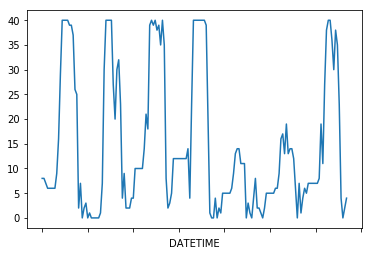

In [10]:
ts.plot()

In [ ]:
plt.plot(ts)

In [ ]:
plt.show()

In [12]:
#check stationarity
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=24).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [15]:
test_stationarity(ts)

KeyboardInterrupt: 